# Introduction 😃😃

## The Car 🚗🚗 😃

- This Car data for work - DNN Classifier in TensorFlow

### About the Columns

- buying = Is there an interest in buying?
- maint = Car needs maintenance
- doors = The number of car doors
- persons = The number of car passenger
- lug_boot= The size luggage
- safety = Safety rate in the car
- rating =Car performance evaluation



# Mission :

- Make  DNN Classifier in TensorFlow about rating  column 
- [acc  = acceptable / good  / unacc = unacceptable / vgood= Very good ]



# * Analyze and Explore DataSet 😃❤️🤝

In [1]:
#Importing the basic librarires 

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("ggplot")  #using style ggplot

%matplotlib inline

import tensorflow as tf

import tempfile
from sklearn.model_selection import train_test_split

In [2]:
#Importing the dataset
df =pd.read_csv("../input/the-cars/car1.csv")


# look the data set
df.head()

,buying,maint,doors,persons,lug_boot,safety,rating
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [3]:
# looking the shape DataSet
df.shape

(1728, 7)

In [4]:
#Checking the dtypes of all the columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   rating    1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [5]:
#checking null value 
df.isna().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
rating      0
dtype: int64

- No missing value

# Some Visualizations 😃❤️🤝

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='buying', ylabel='count'>

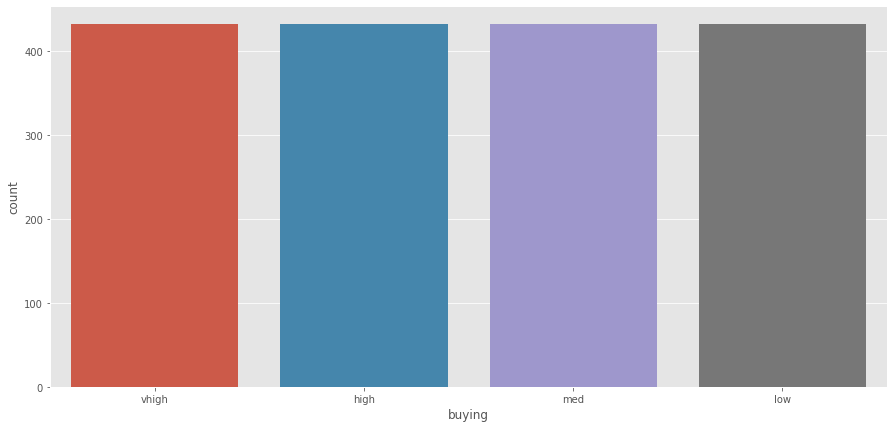

In [6]:
# show the relation buying
plt.figure(figsize=(15,7))
sns.countplot(df["buying"])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='maint', ylabel='count'>

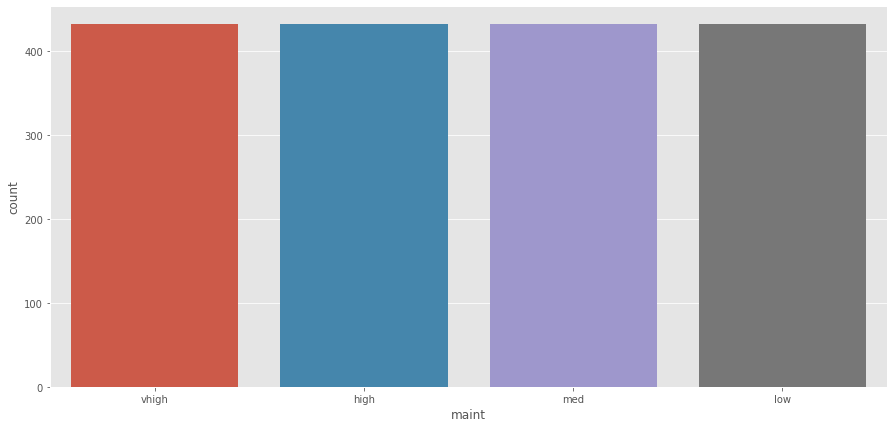

In [7]:
# show the relation maint
plt.figure(figsize=(15,7))
sns.countplot(df["maint"])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='doors', ylabel='count'>

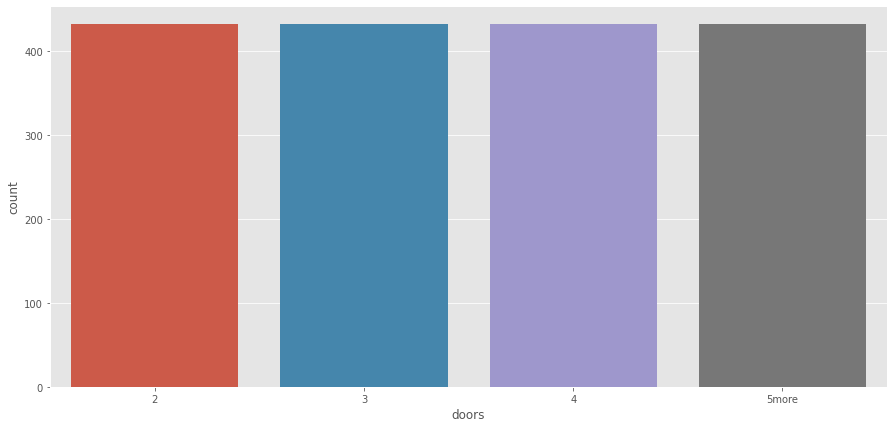

In [8]:
# show the relation doors
plt.figure(figsize=(15,7))
sns.countplot(df["doors"])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='persons', ylabel='count'>

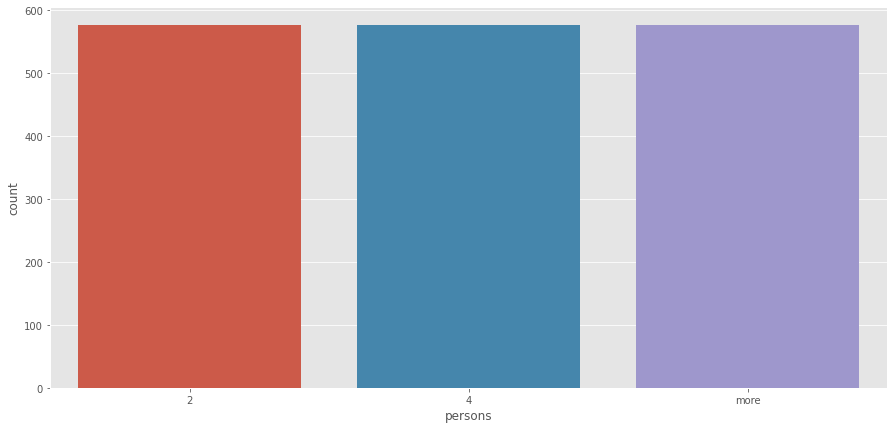

In [9]:
# show the relation persons size
plt.figure(figsize=(15,7))
sns.countplot(df["persons"])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='lug_boot', ylabel='count'>

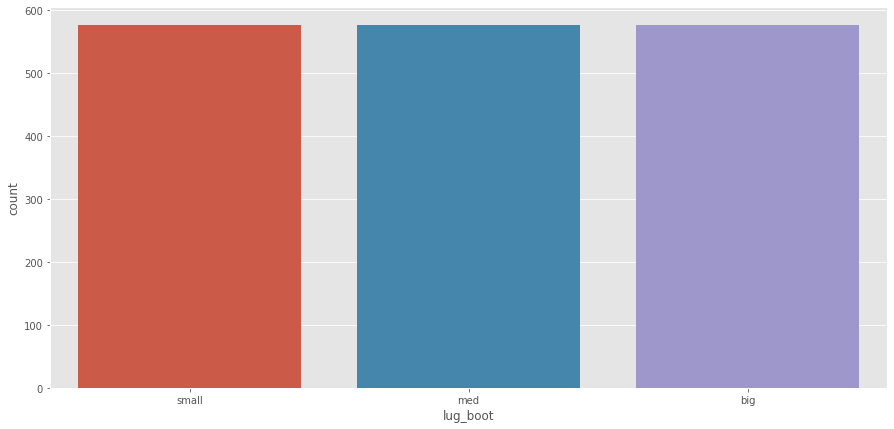

In [10]:
# show the relation luggage 
plt.figure(figsize=(15,7))
sns.countplot(df["lug_boot"])

## I want focusing in my notebook - Make  DNN Classifier in TensorFlow about rating  column

In [11]:
# the unique value

print('buying data is : ' , df['buying'].unique())
print('maint data is : ' , df['maint'].unique())
print('doors data is : ' , df['doors'].unique())
print('persons data is : ' , df['persons'].unique())
print('lug_boot data is : ' , df['lug_boot'].unique())
print('safety data is : ' , df['safety'].unique())
print('rating data is : ' , df['rating'].unique())

buying data is :  ['vhigh' 'high' 'med' 'low']
maint data is :  ['vhigh' 'high' 'med' 'low']
doors data is :  ['2' '3' '4' '5more']
persons data is :  ['2' '4' 'more']
lug_boot data is :  ['small' 'med' 'big']
safety data is :  ['low' 'med' 'high']
rating data is :  ['unacc' 'acc' 'vgood' 'good']


In [12]:
# replace the object datatype to int 
# there another way to replace but I chose this

buying_mapping = {'vhigh': 0,'high': 1,'med': 2,'low': 3}
maint_mapping = {'vhigh': 0,'high': 1,'med': 2,'low': 3}
doors_mapping = {'2': 0,'3': 1,'4': 2,'5more': 3}
persons_mapping = {'2': 0,'4': 1,'more': 2}
lug_boot_mapping = {'small': 0,'med': 1,'big': 2}
safety_mapping = {'low': 0,'med': 1,'high': 2}
rating_mapping = {'unacc': 0,'acc': 1,'good': 2,'vgood': 3}

In [13]:
df['buying'] = df['buying'].map(buying_mapping)
df['maint'] = df['maint'].map(maint_mapping)
df['doors'] = df['doors'].map(doors_mapping)
df['persons'] = df['persons'].map(persons_mapping)
df['lug_boot'] = df['lug_boot'].map(lug_boot_mapping)
df['safety'] = df['safety'].map(safety_mapping)
df['rating'] = df['rating'].map(rating_mapping)

df.head()

,buying,maint,doors,persons,lug_boot,safety,rating
0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0
2,0,0,0,0,0,2,0
3,0,0,0,0,1,0,0
4,0,0,0,0,1,1,0


In [14]:
#Defined X value and y value , and split the data train

X = df.drop(columns="rating")           
y = df["rating"]    # y = quality
# split the data train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print("X Train : ", X_train.shape)
print("X Test  : ", X_test.shape)
print("Y Train : ", y_train.shape)
print("Y Test  : ", y_test.shape)

X Train :  (1296, 6)
X Test  :  (432, 6)
Y Train :  (1296,)
Y Test  :  (432,)


In [15]:
# Specify that all features have real-value data
feature_columns = [tf.feature_column.embedding_column("", dimension=6)]

# Build 3 layer DNN with 512, 256, 128 units respectively.
classifier = tf.estimator.DNNClassifier(feature_columns=feature_columns,
                                            hidden_units=[512, 256, 128],
                                            n_classes=4,
                                            )
classifier

2022-03-12 20:15:04.391963: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [16]:
# Define the training inputs
def get_train_inputs():
    x = tf.constant(X_train)
    y = tf.constant(y_train)
    return x, y

# Define the test inputs
def get_test_inputs():
    x = tf.constant(X_test)
    y = tf.constant(y_test)

    return x, y

In [17]:
# Fit model.
classifier.fit(input_fn=get_train_inputs, steps=1200)

AttributeError: 'DNNClassifierV2' object has no attribute 'fit'

In [ ]:
# Evaluate accuracy.
print(classifier.evaluate(input_fn=get_test_inputs, steps=1))

accuracy_score = classifier.evaluate(input_fn=get_test_inputs, steps=1)["accuracy"]
print("Test Accuracy: {0:f}".format(accuracy_score))  